# K-Means Clustering

In [1]:
# Bibliotheken laden
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
def isDispo(value):
    arbeitsbereiche = value['Arbeitsbereiche']
    # print(arbeitsbereiche)
    searchstring = 'Dispo'
    if searchstring in arbeitsbereiche:
        return True
    else:
        return False
    
    
def isAkquise(value):
    arbeitsbereiche = value['Arbeitsbereiche']
    # print(arbeitsbereiche)
    searchstring = 'Akquise'
    if searchstring in arbeitsbereiche:
        return True
    else:
        return False

## Prepare Data

In [3]:
# Daten laden
dataset = pd.read_csv('umfrage_masterarbeit_03052021.csv', sep = ';')

# Daten preparieren
# Remove columns (Startzeit, Fertigstellungszeit, E-Mail, Name)
dataset = dataset.rename({'Fehlte dir irgendwas? Hier hast du Platz für Ideen, Anmerkungen und Anregungen ...': 'Feedback'}, axis=1)
dataset = dataset.drop(["ID","Startzeit", "Fertigstellungszeit", "E-Mail", "Name", "Feedback"], 1)

# Umbennen der Spalten
dataset = dataset.rename({'Wie alt bist du?': 'Alter'}, axis=1)
dataset = dataset.rename({'An welchem iteratec Standort arbeitest du?': 'Standort'}, axis=1)
dataset = dataset.rename({'Seit wie vielen Jahren bist du bei der iteratec?': 'Jobdauer'}, axis=1)
dataset = dataset.rename({'Was ist dein Aufgabenbereich?': 'Jobrolle'}, axis=1)
dataset = dataset.rename({'Arbeitest du auf überwiegend auf Projekten?': 'Projekte'}, axis=1)
dataset = dataset.rename({'In welchen Bereichen bist du aktiv?': 'Arbeitsbereiche'}, axis=1)
dataset = dataset.rename({'Ich möchte immer wissen, was gerade so los ist, welche Projekte laufen und was meine Kollegen so machen.': '01'}, axis=1)
dataset = dataset.rename({'Neue Leute kennenzulernen finde ich anstrengend.': '02'}, axis=1)
dataset = dataset.rename({'Wenn ich eine Entscheidung treffe, höre ich auf mein Bauchgefühl.': '03'}, axis=1)
dataset = dataset.rename({'Ich lasse gern auf mich zu kommen, was als nächstes passiert.': '04'}, axis=1)
dataset = dataset.rename({'Am liebsten habe ich es, wenn ich weiß was in 2 Wochen passiert.': '05'}, axis=1)
dataset = dataset.rename({'Ich lerne gerne neue Leute kennen.': '06'}, axis=1)
dataset = dataset.rename({'Mir fällt es leicht, Kollegen anzusprechen damit sie mich unterstützen.': '07'}, axis=1)
dataset = dataset.rename({'Ich bin schnell zu motivieren.': '08'}, axis=1)
dataset = dataset.rename({'Ich suche öfter nach Expertise von Kollegen, die bereits Erfahrung mit einer bestimmten Technologie haben.': '09'}, axis=1)
dataset = dataset.rename({'Ich suche öfter nach Mitarbeitern mit freien Kapazitäten, die bestimmte Kenntnisse mitbringen.': '10'}, axis=1)
dataset = dataset.rename({'Ich möchte wissen, in welchen Projekten meine Kollegen unterwegs sind.': '11'}, axis=1)
dataset = dataset.rename({'Mich interessiert, welche Technologien in einem Projekt eingesetzt werden.': '12'}, axis=1)
dataset = dataset.rename({'Ich möchte gerne wissen, wie ein Projekt organisiert ist (z. B. Scrum oder Kanban).': '13'}, axis=1)
dataset = dataset.rename({'Ich möchte einen Überblick über die vergangenen Projekte haben.': '14'}, axis=1)
dataset = dataset.rename({'Ich möchte einen Überblick über die aktuellen Projekte haben.': '15'}, axis=1)
dataset = dataset.rename({'Ich möchte einen Überblick über die kommenden Projekte haben.': '16'}, axis=1)
dataset = dataset.rename({'Einen TechRadar (Übersicht über alle eingesetzten Technologien) über iteratec Projekte finde ich hilfreich.': '17'}, axis=1)
dataset = dataset.rename({'Eine Auswertung über meine eigenen Projekte, Technologien und Tools wäre für mich interessant.': '18'}, axis=1)
dataset = dataset.rename({'Ich möchte sehen, wie sich meine Skills im Laufe der Zeit entwickelt haben.': '19'}, axis=1)
dataset = dataset.rename({'Ich möchte gerne Wunschtechnologien / Tools angeben können, mit denen ich mal arbeiten möchte.': '20'}, axis=1)
dataset = dataset.rename({'Fehlte dir irgendwas? Hier hast du Platz für Ideen, Anmerkungen und Anregungen ...': 'Feedback'}, axis=1)

# Change Answer Values from Text to Number
dataset = dataset.replace(['Trifft überhaupt nicht zu'], -3)
dataset = dataset.replace(['Trifft überwiegend nicht zu'], -2)
dataset = dataset.replace(['Trifft eher nicht zu'], -1)
dataset = dataset.replace(['Keine Angabe'], 0)
dataset = dataset.replace(['Trifft eher zu'], 1)
dataset = dataset.replace(['Trifft überwiegend zu'], 2)
dataset = dataset.replace(['Trifft voll und ganz zu'], 3)

# Optimize Data for Projekte
dataset['Projekte'] = dataset['Projekte'].replace(['Ja, ich bin im Projektkontext tätig'], 'Projekt')
dataset['Projekte'] = dataset['Projekte'].replace(['Ja'], 'Projekt')
dataset['Projekte'] = dataset['Projekte'].replace(['Nein, ich arbeite nur für ein Produkt'], 'Produkt')
dataset['Projekte'] = dataset['Projekte'].replace(['Nein, ich arbeite dauerhaft für ein Produkt (z. B. LUY)'], 'Produkt')
dataset['Projekte'] = dataset['Projekte'].replace(['Nein, ich bin nicht im Projektkontext tätig'], 'Sonstiges')

# Optimize columns for Arbeitsbereiche
dataset['Dispo'] = dataset.apply(isDispo, axis=1)
dataset['Akquise'] = dataset.apply(isAkquise, axis=1)

dataset.head()

,Alter,Standort,Jobdauer,Jobrolle,Projekte,Arbeitsbereiche,01,02,03,04,...,13,14,15,16,17,18,19,20,Dispo,Akquise
0,46 bis 55,Hamburg,über 6 Jahre,Entwicklung;,Projekt,Nichts davon;,1,-1,1,1,...,1,-2,2,2,1,-1,-1,-1,False,False
1,26 bis 35,Wien,1 bis 3 Jahre,Entwicklung;,Projekt,Nichts davon;,3,-1,1,3,...,3,3,3,3,3,2,3,3,False,False
2,26 bis 35,Hamburg,weniger als 1 Jahr,Entwicklung;,Projekt,Nichts davon;,2,1,1,-1,...,2,1,3,2,2,1,2,3,False,False
3,26 bis 35,Hamburg,weniger als 1 Jahr,Entwicklung;,Projekt,Nichts davon;,1,-2,1,1,...,1,2,3,2,3,2,1,3,False,False
4,unter 26,München,1 bis 3 Jahre,Entwicklung;,Projekt,Nichts davon;,2,-1,1,-1,...,2,3,3,1,3,3,-1,-3,False,False


In [4]:
def plotColumnAsBarChartMultiple(df, column, title, clusteranzahl):
    #define number of rows and columns for subplots
    nrow=1
    ncol=clusteranzahl

    # make a list of all dataframes 
    df_list = []
    for n in range(clusteranzahl):
        df_list.append(df.loc[df['cluster'] == n].groupby([column]).size().reset_index(name='count'))
    
    
    fig, axes = plt.subplots(nrow, ncol)
    
    # plot counter
    counter=0
    for r in range(ncol):
        df_list[counter].plot.bar(x=column, y="count", ax=axes[r])
        counter+=1
        
    plt.show()

In [5]:
def auswertung(df, features, clusteranzahl):
    original_df = df
    
    # Normalisieren der Daten
    scaled = preprocessing.MinMaxScaler()
    
    x = df[features].values
    x_scaled = scaled.fit_transform(x)
    df_temp = pd.DataFrame(x_scaled, columns=features, index = df.index)
    df[features] = df_temp
    
    x = df_temp.values
    
    # The elbow method
    from sklearn.cluster import KMeans
    wcss = []

    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    
    # Plotting the Results
    plt.plot(range(1,11), wcss)
    plt.title('The elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') # within cluster sum of squares
    plt.show()
    
    
    # Applying kmeans to the dataset / Creating the kmeans classifier
    kmeans = KMeans(n_clusters = clusteranzahl, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(x)
    result_dataset = pd.DataFrame(y_kmeans, columns=["Predicted Cluster"])
    original_df['cluster'] = result_dataset
    
    plotColumnAsBarChartMultiple(original_df, 'Standort', 'Verteilung der Standorte', clusteranzahl)
    plotColumnAsBarChartMultiple(original_df, 'Jobdauer', 'Zugehörigkeit im Betrieb', clusteranzahl)
    plotColumnAsBarChartMultiple(original_df, 'Alter', 'Verteilung auf Altersstufen', clusteranzahl)
    plotColumnAsBarChartMultiple(original_df, 'Projekte', 'Projekte, Produkt, oder anderes', clusteranzahl)
    #plotColumnAsBarChartMultiple(original_df, 'Jobrolle', 'Verteilung auf Jobrollen')
    
    # Visualising the clusters
    plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')

    # Plotting the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s =  100, c = 'black', label = 'Centeroids')

    # plt.legend()
    plt.show()
    
    #return original_df

D:\Programme\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


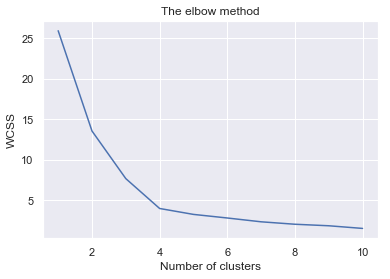

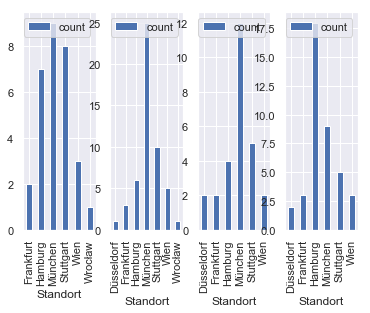

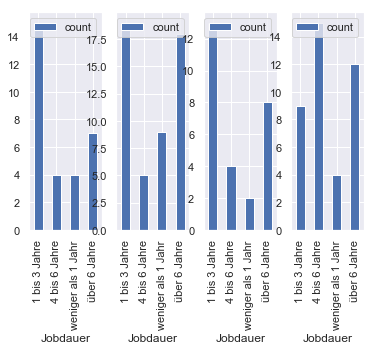

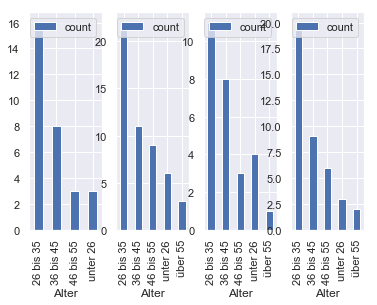

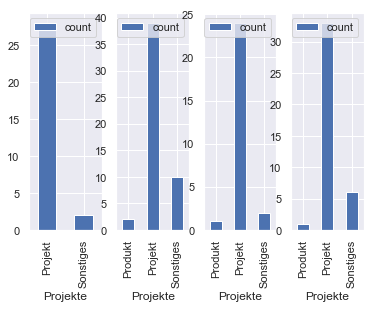

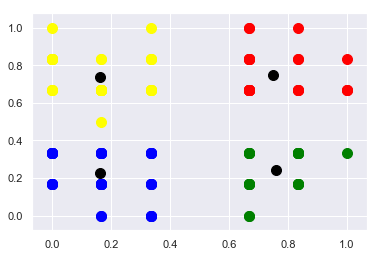

In [6]:
df = auswertung(dataset, ['02', '04'], 4)

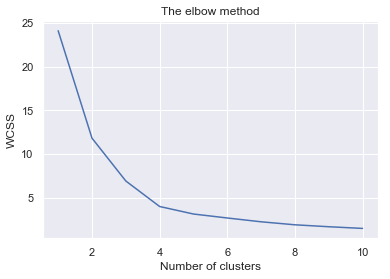

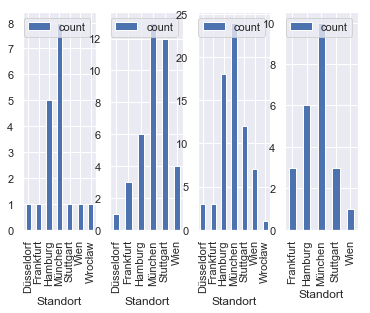

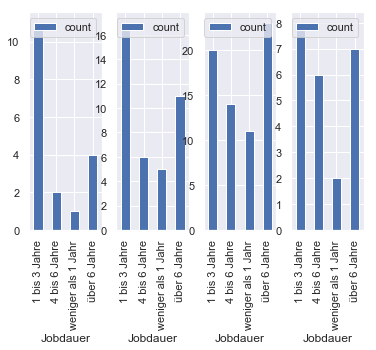

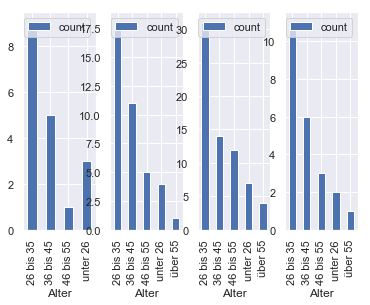

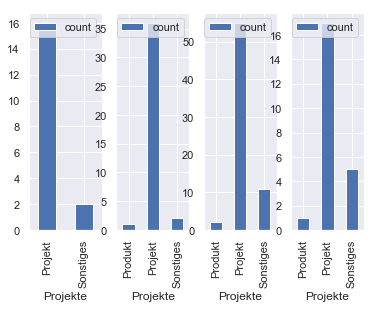

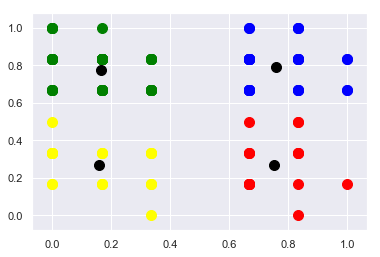

In [7]:
auswertung(dataset, ['02', '09'], 4)

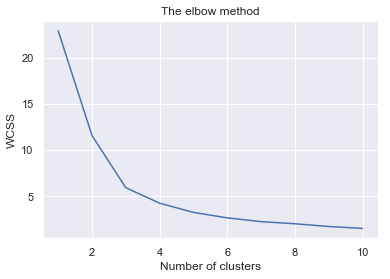

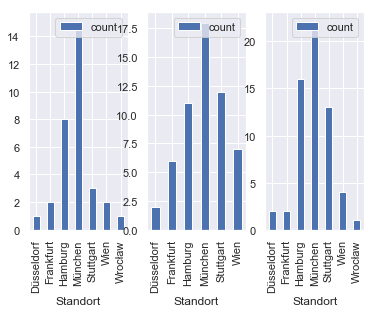

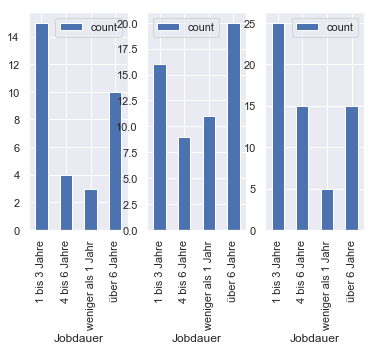

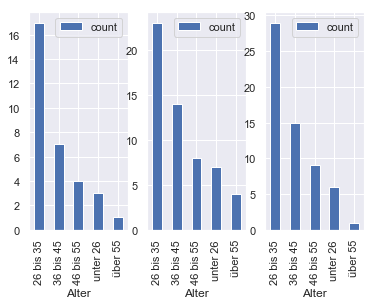

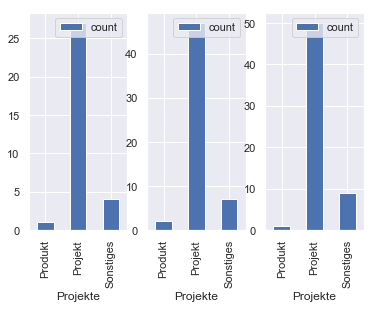

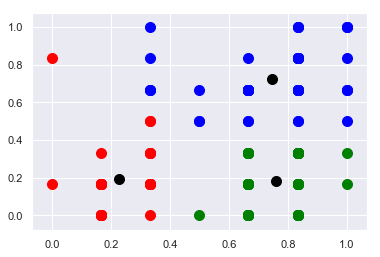

In [8]:
auswertung(dataset, ['09', '10'], 3)

# Hypothesen, die zu klären sind
- Ich möchte sehen, wie sich meine Skills im Laufe der Zeit entwickelt haben. => Zusammenhang zur Jobrolle?
- Ich suche öfter nach Mitarbeitern mit freien Kapazitäten, die bestimmte Kenntnisse mitbringen. => Zusammenhang zum Arbeitsbereich Dispo oder Akquise?
- Haben Leute, die nicht im Projektkontext tätig sind, das gleiche Interesse an einem Tech Rader? Eingesetzten Technologien etc.?